
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [4]:

import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
import numpy as np

class StandardScalerManual:
    def fit(self, X):
        # axis=0 calculates stats for each column (feature)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        
    def transform(self, X):
        # Subtract mean and divide by std deviation
        # 1e-9 prevents division by zero if std is 0
        return (X - self.mean) / (self.std + 1e-9)
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [2]:
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = 0
        self.losses = []

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = X @ self.w + self.b

            loss = np.mean((y_pred - y) ** 2) + (self.l2_lambda / (2 * m)) * np.sum(self.w ** 2)
            self.losses.append(loss)

            dw = (2 / m) * (X.T @ (y_pred - y)) + (self.l2_lambda / m) * self.w
            db = (2 / m) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b


In [7]:
import matplotlib.pyplot as plt

# Dummy data
np.random.seed(0)
X = np.random.rand(100, 2)
y = 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(100) * 0.5

# Scaling
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

# Train model
model = LinearRegressionManual(lr=0.1, epochs=500, l2_lambda=0.1)
model.fit(X_scaled, y)

# Predictions
y_pred = model.predict(X_scaled)


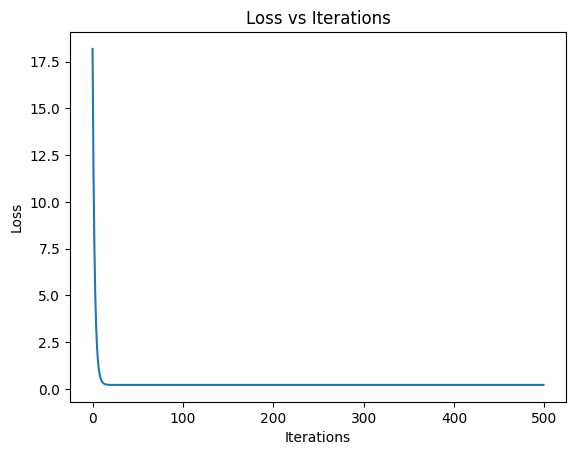

In [8]:
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()


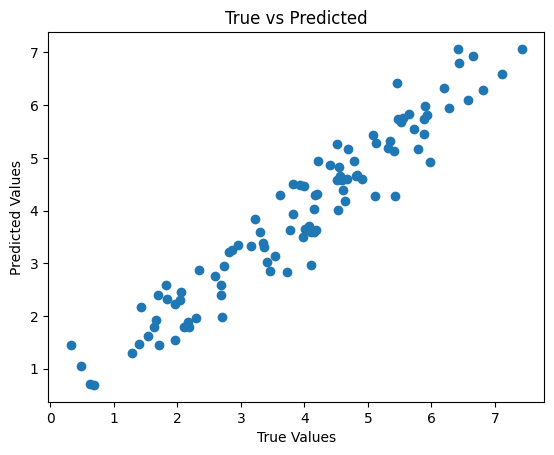

In [22]:
plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

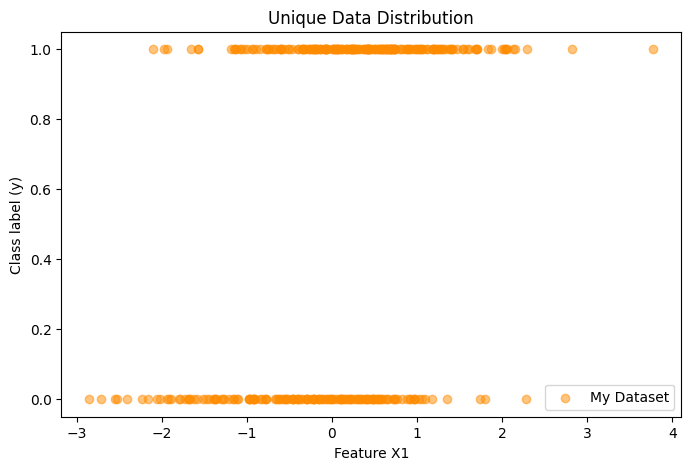

In [33]:
# Logistic Regression Implementation 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.01):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        
        for i in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)
            
            # Binary Cross Entropy Loss with Epsilon for stability
            epsilon = 1e-15
            y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)
            
            bce_loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
            l2_penalty = (self.l2_lambda / (2 * n_samples)) * np.sum(np.square(self.weights))
            self.history.append(bce_loss + l2_penalty)
            
            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Updates
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        return self.weights, self.bias, self.history

    def predict_proba(self, X):
        return sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)
 


np.random.seed(25)  
n_points = 350  
X_data = np.random.randn(n_points, 2)

# Modified weights/bias to change the 'slope' of the boundary
gen_weights = np.array([1.2, -2.5]) 
gen_bias = 0.3
y_data = (sigmoid(np.dot(X_data, gen_weights) + gen_bias) > 0.5).astype(int)
 
plt.figure(figsize=(8, 5))



plt.scatter(X_data[:, 0], y_data, alpha=0.5, color='darkorange', label='My Dataset')
plt.xlabel("Feature X1")
plt.ylabel("Class label (y)")
plt.title("Unique Data Distribution")
plt.legend()
plt.show()

 
split = int(0.8 * n_points)
X_train, X_test = X_data[:split], X_data[split:]
y_train, y_test = y_data[:split], y_data[split:]

scaler = StandardScalerManual()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegressionManual(lr=0.1, epochs=1500, l2_lambda=0.05)
w, b, losses = model.fit(X_train_scaled, y_train)
 

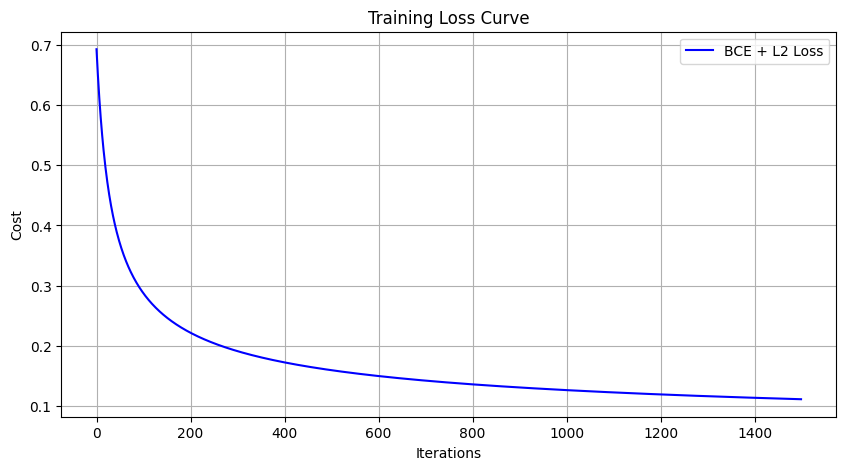

--- Results ---
Final Weights: [ 2.70329054 -5.44925489]
Final Bias: 0.9568
Final Accuracy: 100.00%


In [34]:
# Reporting and Visualization


# Plot Training Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(losses, color='blue', label='BCE + L2 Loss')
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.legend()
plt.show()

# Final Accuracy Report
predictions = model.predict(X_test_scaled)
accuracy = np.mean(predictions == y_test)
print(f"--- Results ---")
print(f"Final Weights: {w}")
print(f"Final Bias: {b:.4f}")
print(f"Final Accuracy: {accuracy * 100:.2f}%")


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans_matrix(M, k, max_iters=100):
    rows, cols = M.shape
    centroids = np.random.choice(M.flatten(), size=k, replace=False)
    assignment_table = np.zeros((rows, cols), dtype=int)

    for _ in range(max_iters):
        cookbook = {i: [] for i in range(k)}

        # Assignment step
        for i in range(rows):
            for j in range(cols):
                distances = np.abs(M[i, j] - centroids)
                cluster_id = np.argmin(distances)
                assignment_table[i, j] = cluster_id
                cookbook[cluster_id].append((i, j))



        # Update step
        new_centroids = centroids.copy()
        for cid in range(k):
            if cookbook[cid]:
                values = [M[i, j] for (i, j) in cookbook[cid]]
                new_centroids[cid] = np.mean(values)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return assignment_table, cookbook, centroids

In [21]:

np.random.seed(42)

# Generating a new 6x6 random matrix  
M = np.random.rand(6, 6) * 50
k = 3

assignment_table, cookbook, centroids = kmeans_matrix(M, k)

print("INPUT MATRIX (M):")
print(M)

print("\nFINAL CENTROIDS:")
for i, c in enumerate(centroids):
    print(f"Cluster {i}: Centroid = {c:.2f}")

print("\nASSIGNMENT TABLE (Cluster Labels):")
print(assignment_table)

print("\nCLUSTER CONTENTS:")
for cid, positions in cookbook.items():
    print(f"\nCluster {cid}:")
    for (i, j) in positions:
        print(f"  M[{i},{j}] = {M[i,j]:.2f}")


INPUT MATRIX (M):
[[18.72700594 47.53571532 36.59969709 29.93292421  7.80093202  7.79972602]
 [ 2.90418061 43.30880729 30.05575059 35.40362889  1.02922471 48.49549261]
 [41.62213204 10.61695553  9.09124836  9.17022549 15.21211215 26.23782158]
 [21.59725093 14.56145701 30.59264474  6.97469303 14.60723243 18.31809216]
 [22.80349921 39.25879807  9.98368911 25.71172192 29.62072844  2.32252064]
 [30.3772426   8.52620618  3.25257965 47.44427686 48.28160165 40.41986741]]

FINAL CENTROIDS:
Cluster 0: Centroid = 19.75
Cluster 1: Centroid = 38.60
Cluster 2: Centroid = 6.62

ASSIGNMENT TABLE (Cluster Labels):
[[0 1 1 1 2 2]
 [2 1 1 1 2 1]
 [1 2 2 2 0 0]
 [0 0 1 2 0 0]
 [0 1 2 0 1 2]
 [1 2 2 1 1 1]]

CLUSTER CONTENTS:

Cluster 0:
  M[0,0] = 18.73
  M[2,4] = 15.21
  M[2,5] = 26.24
  M[3,0] = 21.60
  M[3,1] = 14.56
  M[3,4] = 14.61
  M[3,5] = 18.32
  M[4,0] = 22.80
  M[4,3] = 25.71

Cluster 1:
  M[0,1] = 47.54
  M[0,2] = 36.60
  M[0,3] = 29.93
  M[1,1] = 43.31
  M[1,2] = 30.06
  M[1,3] = 35.40
  M[1

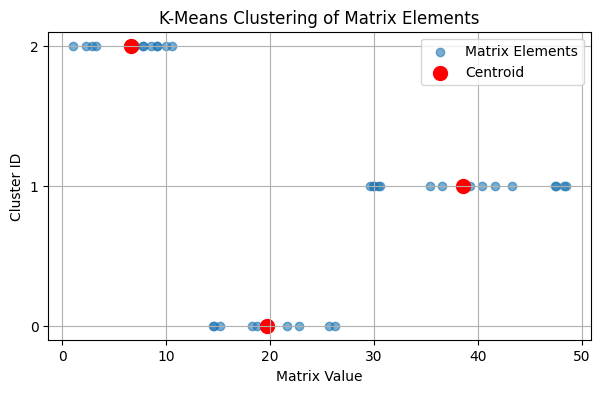

In [18]:
import matplotlib.pyplot as plt
values = []
clusters = []

for cid, positions in cookbook.items():
    for (i, j) in positions:
        values.append(M[i, j])
        clusters.append(cid)

values = np.array(values)
clusters = np.array(clusters)

plt.figure(figsize=(7, 4))
plt.scatter(values, clusters, alpha=0.6, label="Matrix Elements")
for i, c in enumerate(centroids):
    plt.scatter(c, i, marker='o', color='red', s=100,
                label="Centroid" if i == 0 else "")

plt.xlabel("Matrix Value")
plt.ylabel("Cluster ID")
plt.yticks(range(len(centroids)))
plt.title("K-Means Clustering of Matrix Elements")
plt.legend()
plt.grid(True)
plt.show()


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
